In this last exercise we will look at classification when there are more than two categories.
Specifically we will examine classificaiton of credit ratings, from AAA to 'AA' 'A' 'BBB' 'BB' 'B' and 'CCC'.
We will try to predict the ratings from co-variates on specific firms:

{'WC_TA'}     Working Capital to Total Assets

{'RE_TA'}     Retained Earning to Total Assets

{'EBIT_TA'}   Earnings before Interets and Taxes to Total Assets

{'MVE_BVTD'}  Market Value of Equity to Book Value of Total Debt  

{'S_TA'}      Sales to Total Assets

{'Industry'}  Industry Classificaiton (1-12)


The Industry classification is based on the Fama - French use of the SIC codes.They assign each NYSE, AMEX, and NASDAQ stock to an industry portfolio at the end of June of year t based on its four-digit SIC code at that time. (We use Compustat SIC codes for the fiscal year ending in calendar year t-1. Whenever Compustat SIC codes are not available, we use CRSP SIC codes for June of year t.) We then compute returns from July of t to June of t+1.  As you can see, the higher the level of classificaiton the greater the degree of dependence on human capital.

The following definitions are used:


1 NoDur  Consumer Nondurables -- Food, Tobacco, Textiles, Apparel, Leather, Toys
          0100-0999
          2000-2399
          2700-2749
          2770-2799
          3100-3199
          3940-3989

 2 Durbl  Consumer Durables -- Cars, TVs, Furniture, Household Appliances
          2500-2519
          2590-2599
          3630-3659
          3710-3711
          3714-3714
          3716-3716
          3750-3751
          3792-3792
          3900-3939
          3990-3999

 3 Manuf  Manufacturing -- Machinery, Trucks, Planes, Off Furn, Paper, Com Printing
          2520-2589
          2600-2699
          2750-2769
          3000-3099
          3200-3569
          3580-3629
          3700-3709
          3712-3713
          3715-3715
          3717-3749
          3752-3791
          3793-3799
          3830-3839
          3860-3899

 4 Enrgy  Oil, Gas, and Coal Extraction and Products
          1200-1399
          2900-2999

 5 Chems  Chemicals and Allied Products
          2800-2829
          2840-2899

 6 BusEq  Business Equipment -- Computers, Software, and Electronic Equipment
          3570-3579
          3660-3692
          3694-3699
          3810-3829
          7370-7379

 7 Telcm  Telephone and Television Transmission
          4800-4899

 8 Utils  Utilities
          4900-4949

 9 Shops  Wholesale, Retail, and Some Services (Laundries, Repair Shops)
          5000-5999
          7200-7299
          7600-7699

10 Hlth   Healthcare, Medical Equipment, and Drugs
          2830-2839
          3693-3693
          3840-3859
          8000-8099

11 Money  Finance
          6000-6999

12 Other  Other -- Mines, Constr, BldMt, Trans, Hotels, Bus Serv, Entertainment


$\textbf{Data Sets}$

We will make use of three data sets, 
CreditRating_ExPost.dat,  for training
CreditRating_NewCompanies.dat, for testing out-of-sample                          
CreditRating_Historical.dat,  for overall evaluation

$\textbf{Support Vector Machines}$

We will first try the Support Vector Machine.  It is basically an extension of logit and probit regression.
For a given set of classifications $x_i$, i=1,...K,  and a set of classificaitons $y_j$, j= 1,...J, we select coefficients to minimize:

$f(\textbf{w},b)$ = $\lambda \ \|\textbf{w}\|^2 + [\frac{1}{n} \Sigma_{i=1}^{n} max(0, 1-y(\textbf{w}'x-b))]$
where $\|w \|$ is the Euclidean norm of of the K-element parameter vector w:

$\|w \|$ = $\sqrt{\Sigma_k^K w_k^2}$




The parameter $\lambda$ is called the $\textit{soft margin parameter}$.  

One way to work with this is to use a grid, $\lambda \in {2^{-5},2^{-3}, ....2^{15}}$ with cross validation.


In [35]:
# Uncomment the following line to install shap
#!pip install shap


#!pip install pandas scikit-learn matplotlib 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
#import shap
import matplotlib.pyplot as plt
#import numba

# Read the data into a DataFrame
column_types = {
    'Column1': int,  # Integer
    'Column2': float,  # Float
    'Column3': float,  # Float
    'Column4': float,  # Float
    'Column5': float,  # Float
    'Column6': float,  # Float
    'Column7': float,  # Float
    'Column8': str  # String
}

# Read the Excel file with specified data types
#tbl = pd.read_excel('CreditRatingHist.xlsx', dtype=column_types)
tbl = pd.read_excel('CreditRatingHist.xlsx', header=0)

# Print the first few rows to check if it's reading correctly
print(tbl.head())

#tbl = pd.read_excel('CreditRatingHist.xlsx')

# Check the size of the DataFrame
print(tbl.shape)

# Create a RandomForestClassifier (or any suitable classifier)


      ID  WC_TA  RE_TA  EBIT_TA  MVE_BVTD   S_TA  Industry Rating
0  62394  0.013  0.104    0.036     0.447  0.142         3     BB
1  48608  0.232  0.335    0.062     1.969  0.281         8      A
2  42444  0.311  0.367    0.074     1.935  0.366         1      A
3  48631  0.194  0.263    0.062     1.017  0.228         4    BBB
4  43768  0.121  0.413    0.057     3.647  0.466        12    AAA
(3932, 8)


In [36]:

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Create a RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)

# Specify predictor and target variables
X = tbl.iloc[:,1:-1]
print(X.columns)
y = tbl.iloc[:,7]
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = tbl['Rating']
print(X.shape)




Index(['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry'], dtype='object')
(3932, 6)


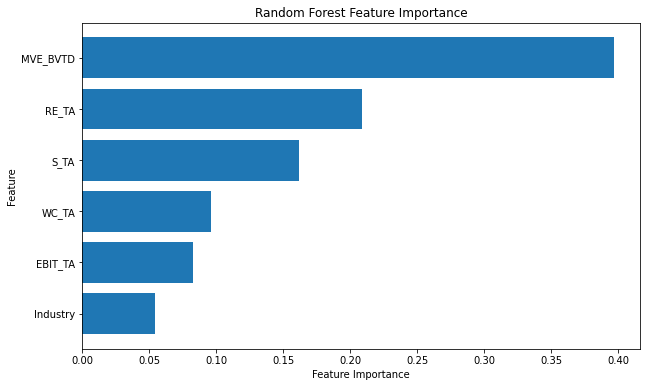

In [37]:
# Fit the classifier
classifier.fit(X, y)

# Get feature importances from the trained classifier
feature_importances = classifier.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


$\textbf{Multinomial Logit Regression}$

In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant
from pandas.api.types import CategoricalDtype

import pandas as pd
import statsmodels.api as sm

# Assuming you've already read the data correctly into 'tbl'

# Define the category order for the ordinal response variable
category_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC']
tbl['Rating'] = pd.Categorical(tbl['Rating'], categories=category_order, ordered=True)

# Define your predictor variables (X) and response variable (Y)
X = tbl[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry']]
import numpy as np

# Assuming X is your matrix
# Calculate the minimum and maximum values for each column (feature)
min_vals = X.min(axis=0)
max_vals = X.max(axis=0)

# Perform Min-Max scaling
X_normalized = (X - min_vals) / (max_vals - min_vals)
#X = sm.add_constant(X)
Y = tbl['Rating']


# Fit the multinomial logistic regression model
model = sm.MNLogit(Y, X_normalized)
results = model.fit(maxiter=1000)

# Print the summary of the model
print(results.summary())


C:\Users\mcnel\anaconda4\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\mcnel\anaconda4\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully.
         Current function value: nan
         Iterations 16
                          MNLogit Regression Results                          
Dep. Variable:                 Rating   No. Observations:                 3932
Model:                        MNLogit   Df Residuals:                     3896
Method:                           MLE   Df Model:                           30
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                     nan
Time:                        13:30:02   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -7070.1
Covariance Type:            nonrobust   LLR p-value:                       nan
 Rating=AA       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
WC_TA        -35.0828      6.509     -5.390      0.000     -47.840     -22.325
RE_TA         -2.8205     10.348 

$\textit{Interpretation}$

In a multinomial logistic regression, the coefficients represent the log-odds of moving from one category to another. In your case, since you are looking at the transition from AAA to AA, let's focus on the coefficients for the 'WC_TA' predictor variable.

For the 'WC_TA' variable:

Coefficient (coef) = -35.0828
p-value (P>|z|) < 0.001 (significant)

The coefficient of -35.0828 means that for a one-unit increase in 'WC_TA', the log-odds of moving from AAA to AA decrease by 35.0828 units. Since the p-value is less than 0.001 and significant, this suggests that the 'WC_TA' variable has a statistically significant effect on the transition from AAA to AA.

In more intuitive terms, an increase in 'WC_TA' would make it less likely for a company to transition from AAA to AA. This implies that as 'WC_TA' increases, the company is less likely to move from the higher rating (AAA) to the lower rating (AA).

Please note that the interpretation of the coefficients can vary depending on the coding scheme used for your categorical response variable. In your case, it seems like you are looking at the transition between two specific categories, so the interpretation is specific to that transition.

The same is true for the second equation for A. The coefficient WC_TA = -68.0484 shows that an increase in working capital reduces the odds of transition from AAA to A by even more.  

In [39]:
from sklearn.metrics import confusion_matrix
predicted_classes = results.predict(X_normalized).idxmax(axis=1)
label_mapping = {0: 'AAA', 1: 'AA', 2: 'A', 3: 'BBB', 4: 'BB', 5: 'B', 6: 'CCC'}
# Convert integer labels to string labels using the mapping


# Convert integer labels to string labels using the mapping
predicted_classes = predicted_classes.map(label_mapping)

# Create a confusion matrix
confusion_logistic = confusion_matrix(Y, predicted_classes)

# Plot the confusion matrix with custom axis labels
print(confusion_logistic)




[[398  58   0   0   1 118   0]
 [ 63 281  41   0   0   0   0]
 [  1  44 535   0   0   0   0]
 [  1   0   0 133 169   2  15]
 [  0   0   0  65 697 165   0]
 [ 70   0   0   2 184 759   0]
 [  0   0   2  36   7   0  85]]


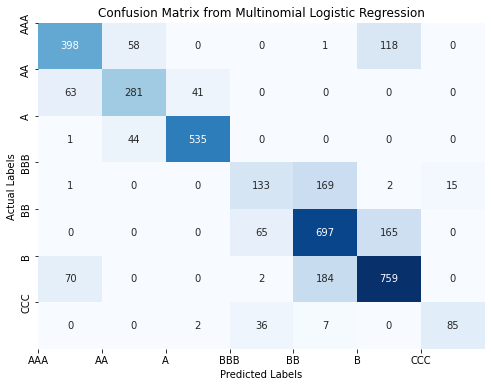

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set custom axis labels
class_labels = list(label_mapping.values())
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix from Multinomial Logistic Regression')
plt.show()







We see in the regression results that the industry classifications are not significant.


$\textbf{Random Forests}$

Now let's look at the Random Forests for different numbers of trees and leaves on the trees.

In [42]:
import pandas as pd

# Specify header=None to indicate that there is no header row
tbl = pd.read_excel('CreditRatingHist.xlsx', header=None)

# Extract the first row as column names
column_names = tbl.iloc[0]

# Remove the first row from the DataFrame
tbl = tbl[1:]

# Set the correct column names
tbl.columns = column_names

# Now you can work with the DataFrame containing the correct column names
print(tbl.head())

tblnew = pd.read_excel('CreditRatingNew1.xlsx', header=None)

# Extract the first row as column names
column_names = tblnew.iloc[0]

# Remove the first row from the DataFrame
tblnew = tblnew[1:]


# Set the correct column names
tblnew.columns = column_names

# Now you can work with the DataFrame containing the correct column names
print(tblnew.head())
print(len(tblnew))









0     ID  WC_TA  RE_TA EBIT_TA MVE_BVTD   S_TA Industry Rating
1  62394  0.013  0.104   0.036    0.447  0.142        3     BB
2  48608  0.232  0.335   0.062    1.969  0.281        8      A
3  42444  0.311  0.367   0.074    1.935  0.366        1      A
4  48631  0.194  0.263   0.062    1.017  0.228        4    BBB
5  43768  0.121  0.413   0.057    3.647  0.466       12    AAA
0     ID  WC_TA  RE_TA EBIT_TA MVE_BVTD   S_TA Industry Rating
1  60644  0.049   0.22   0.041      2.4  0.489        6     AA
2  33083  0.145   0.24   0.051    1.514   0.28        4    BBB
3  63830   0.17  0.177   0.056    1.685  0.455        7    BBB
4  84658  0.164  0.289   0.064    1.029  0.222        3    BBB
5  41734  0.078  0.066   0.044    0.417  0.147        9     BB
1311


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Read historical data into a DataFrame


# Specify predictor variables (X) and response variable (Y)
X = tbl[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry']]
Y = tbl[['Rating']]
print(len(X))

# Set the number of trees and minimum leaf size




3932


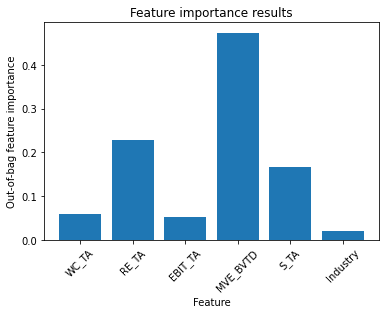

In [44]:
n_trees = 100
min_leaf_size = 10

# Create a RandomForestClassifier
classifier = RandomForestClassifier(
    n_estimators=n_trees,
    min_samples_leaf=min_leaf_size,
    oob_score=True,  # Enable out-of-bag error estimation
    random_state=0  # Set a random seed for reproducibility
)

# Fit the classifier
Y = Y.values.ravel()
classifier.fit(X, Y)

# Get out-of-bag feature importances
feature_importances = classifier.feature_importances_

# Get feature names
feature_names = X.columns

# Plot feature importances with feature names as x-axis labels
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel('Out-of-bag feature importance')
plt.title('Feature importance results')

# Extract class names
class_names = classifier.classes_

# Read data for new companies into a DataFrame

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Read data for new companies into a DataFrame and specify column names
#newDS = pd.read_csv('CreditRating_NewCompanies.dat', sep='\t', header=None, names=['ID', 'WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry', 'Rating'])

# Specify predictor variables for new companies (new_X)
new_X = tblnew[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry']]

# Specify the target variable (new_Y)
new_Y = tblnew[['Rating']]

# Handle missing values (if needed)
# new_X.fillna(0, inplace=True)  # Uncomment if you want to fill missing values with zero

# Convert the data to a suitable data type (e.g., 'float32')
new_X = new_X.astype('float32')

# Print the dimensions of new_X and new_Y for verification
print("Dimensions of new_X:", new_X.shape)
print("Dimensions of new_Y:", new_Y.shape)






Dimensions of new_X: (1311, 6)
Dimensions of new_Y: (1311, 1)


In [46]:
# Now you can make predictions with the cleaned and converted data
pred_class = classifier.predict(new_X)
classif_score = classifier.predict_proba(new_X)

# Create a DataFrame with predictions
predDS = pd.DataFrame({'ID': tblnew['ID'], 'PredRating': pred_class})

# Extract class names from the classifier
class_names = classifier.classes_

# Add class probability columns with correct names
for idx, class_name in enumerate(class_names):
    predDS[class_name] = classif_score[:, idx]




In [47]:
# Assuming you have executed the code snippet you provided

# Predict class labels for new_X
pred_class = classifier.predict(new_X)

# Predict class probabilities for new_X
classif_score = classifier.predict_proba(new_X)

# Create a DataFrame with predictions
predDS = pd.DataFrame({'ID': tblnew['ID'], 'PredRating': pred_class})

# Extract class names from the classifier
class_names = classifier.classes_

# Add class probability columns with correct names
for idx, class_name in enumerate(class_names):
    predDS[class_name] = classif_score[:, idx]

# Now you can obtain the predicted categories (predicted_categories) from pred_class
predicted_categories = pred_class


In [49]:

from sklearn.metrics import confusion_matrix

# Convert all labels to lowercase for consistency
actual_categories_lower = [label.lower() for label in actual_category_labels]
predicted_categories_lower = [label.lower() for label in predicted_category_labels]

# Generate the confusion matrix
confusion_rf = confusion_matrix(actual_categories_lower, predicted_categories_lower)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_rf)

Confusion Matrix:
[[143  22   0   0   0  39   0]
 [ 26 103   9   0   0   0   0]
 [  0  15 201   0   0   0   0]
 [  0   0   0  36  55   0   2]
 [  0   0   0  14 219  52   0]
 [ 31   0   0   0  53 239   0]
 [  0   0   0  14   1   0  37]]


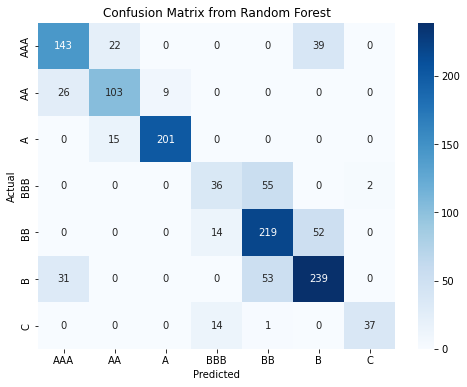

In [50]:
#!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix computed and stored in the variable 'confusion'
# 'confusion' should be a square matrix where each row and column corresponds to a category

# Define category labels (assuming you have 7 categories)
category_labels = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'C']
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix from Random Forest')
plt.show()




In [51]:
# Assuming you have confusion matrices: confusion_rf and confusion_logisit

# Calculate accuracy for each confusion matrix
def calculate_accuracy(confusion_matrix):
    TP = confusion_matrix[1, 1]  # True Positives
    TN = confusion_matrix[0, 0]  # True Negatives
    FP = confusion_matrix[0, 1]  # False Positives
    FN = confusion_matrix[1, 0]  # False Negatives
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy

accuracy_rf = calculate_accuracy(confusion_rf)
accuracy_logistic = calculate_accuracy(confusion_logistic)

# Compare the accuracies
print("Accuracy for Random Forest:", accuracy_rf)
print("Accuracy for Logistic Regression:", accuracy_logistic)

# Determine which model has higher accuracy
if accuracy_rf > accuracy_logistic:
    print("Random Forest has higher accuracy.")
elif accuracy_logistic > accuracy_rf:
    print("Logistic Regression has higher accuracy.")
else:
    print("Both models have the same accuracy.")


Accuracy for Random Forest: 0.8367346938775511
Accuracy for Logistic Regression: 0.84875
Logistic Regression has higher accuracy.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (assuming it's stored in a DataFrame 'data')
# Replace 'data.csv' with your dataset file path
data = pd.read_csv('data.csv')


# Encode the categorical target variable (Y)
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, Y_train)

# Make predictions using the SVM classifier
Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
svm_accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Generate a confusion matrix for SVM
svm_confusion = confusion_matrix(Y_test, Y_pred_svm)
print('SVM Confusion Matrix:')
print(svm_confusion)

# Classification Report for SVM
svm_report = classification_report(Y_test, Y_pred_svm)
print('SVM Classification Report:')
print(svm_report)

# XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))
xgb_classifier.fit(X_train, Y_train)

# Make predictions using the XGBoost classifier
Y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the XGBoost classifier
xgb_accuracy = accuracy_score(Y_test, Y_pred_xgb)
print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')

# Generate a confusion matrix for XGBoost
xgb_confusion = confusion_matrix(Y_test, Y_pred_xgb)
print('XGBoost Confusion Matrix:')
print(xgb_confusion)

# Classification Report for XGBoost
xgb_report = classification_report(Y_test, Y_pred_xgb)
print('XGBoost Classification Report:')
print(xgb_report)
